# Optimización Económica de un Ingenio Azucarero
Este notebook muestra un ejemplo didáctico de cómo las decisiones operativas afectan simultáneamente:

- **Azúcar $(Q_s)$**  
- **Alcohol $(Q_a)$**  
- **Energía $(Q_e)$**

y cómo maximizar el **beneficio económico total** usando una función no lineal con **máximos locales y un global interior**.  

Visualizamos los **trade-offs entre variables** y destacamos el **óptimo global interior**, que sería difícil de encontrar con algoritmos locales.

## 1️⃣ Variables de decisión

Se consideran tres variables de decisión principales:

| Variable | Significado |
|----------|------------|
| $(T_m)$ | Torque de molinos (mayor torque → más bagazo → más energía, pero mayor consumo) |
| $(W_{imb})$ | Agua de imbibición (mejora extracción de azúcar) |
| $(M_d)$ | Melaza enviada a destilería (incrementa producción de alcohol) |

> Para visualización 3D, haremos slices fijos de una variable y graficaremos las otras dos.

## 2️⃣ Funciones de producción

### Azúcar
$$
Q_s(T_m, W_{imb}) = \alpha_s \, T_m (1 - \beta_s T_m) \cdot W_{imb} (1 - \gamma_s W_{imb})
$$

- Cóncava respecto a $(T_m)$ y $(W_{imb})$, penaliza excesos
- Representa extracción y pérdidas no lineales

### Alcohol
$$
Q_a(M_d) = \alpha_a \, M_d (1 - \beta_a M_d)
$$

### Energía
$$
Q_e(T_m) = \alpha_e \, T_m (1 - \beta_e T_m)
$$

- Más torque genera energía con bagazo pero consume con motores... simula entonces rendimientos decrecientes
- Refleja trade-off entre producción de azúcar, agotamiento de melaza y energía vendible

## 3️⃣ Beneficio económico total

Precios:

$$
p_s, p_a, p_e
$$

Costos operativos:

$$
C(T_m, W_{imb}, M_d) = c_T T_m^2 + c_W W_{imb}^2 + c_M M_d^2
$$

Función objetivo:

$$
\Pi(T_m, W_{imb}, M_d) = p_s Q_s + p_a Q_a + p_e Q_e - C
$$

- Máximos locales aparecen debido a no linealidades
- Óptimo global interior refleja el **trade-off real entre los 3 productos**

<>:61: SyntaxWarning: invalid escape sequence '\P'
<>:61: SyntaxWarning: invalid escape sequence '\P'
/var/folders/z_/32_txhjj52v5k49pnwncxqnw0000gn/T/ipykernel_1364/1231651389.py:61: SyntaxWarning: invalid escape sequence '\P'
  ax.set_zlabel('Beneficio económico $\Pi(T_m,W_{imb},M_d)$')


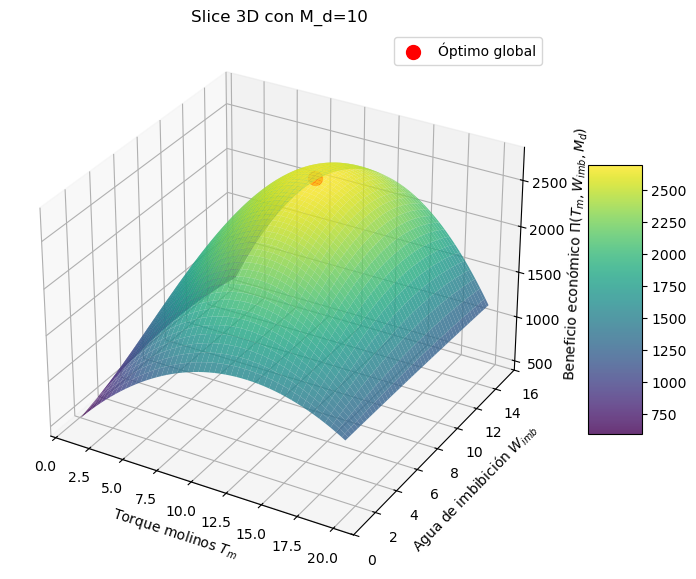

Óptimo global (slice): T_m = 11.07, W_imb = 9.83, Beneficio = 2695.56


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de precios
p_s = 40
p_a = 60
p_e = 30

# Parámetros de producción
alpha_s = 1.5
beta_s = 0.05
gamma_s = 0.05
alpha_a = 1.2
beta_a = 0.04
alpha_e = 4.0
beta_e = 0.03

# Costos
c_T = 0.3
c_W = 0.2
c_M = 0.5

# Rango de variables
T_m = np.linspace(1, 20, 150)
W_imb = np.linspace(1, 15, 150)
M_d = np.linspace(1, 20, 150)

# Elegimos un slice fijo para melaza para 3D: M_d fijo en medio del rango
M_fixed = 10

T_mesh, W_mesh = np.meshgrid(T_m, W_imb)

# Producción azúcar
Q_s = alpha_s * T_mesh * (1 - beta_s*T_mesh) * W_mesh * (1 - gamma_s*W_mesh)

# Producción alcohol (slice fijo)
Q_a = alpha_a * M_fixed * (1 - beta_a * M_fixed)

# Producción energía
Q_e = alpha_e * T_mesh * (1 - beta_e*T_mesh)

# Beneficio total
Profit = p_s*Q_s + p_a*Q_a + p_e*Q_e - (c_T*T_mesh**2 + c_W*W_mesh**2 + c_M*M_fixed**2)

# Óptimo
max_idx = np.unravel_index(np.argmax(Profit), Profit.shape)
T_opt = T_mesh[max_idx]
W_opt = W_mesh[max_idx]
Pi_opt = Profit[max_idx]

# Gráfica 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_mesh, W_mesh, Profit, cmap='viridis', alpha=0.8)

# Óptimo
ax.scatter(T_opt, W_opt, Pi_opt, color='r', s=100, label='Óptimo global')

ax.set_xlabel('Torque molinos $T_m$')
ax.set_ylabel('Agua de imbibición $W_{imb}$')
ax.set_zlabel('Beneficio económico $\Pi(T_m,W_{imb},M_d)$')
ax.set_title(f'Slice 3D con M_d={M_fixed}')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

print(f"Óptimo global (slice): T_m = {T_opt:.2f}, W_imb = {W_opt:.2f}, Beneficio = {Pi_opt:.2f}")

## 4️⃣ Interpretación

1. La superficie 3D muestra que el **máximo beneficio no está en los extremos**, sino en un **óptimo interior**.
2. Trade-off claro:
   - Aumentar torque mejora extracción de azúcar, pero reduce energía vendible por mayor consumo
   - Aumentar agua de imbibición aumenta azúcar, pero con rendimientos decrecientes y mayor costo
3. El punto rojo indica la **decisión operativa óptima** que maximiza el beneficio económico total
4. Mensaje clave financiero:  
   > "El ingenio no maximiza una variable aislada. El óptimo surge de **considerar el beneficio total** y los trade-offs no lineales."

## 5️⃣ ¿Por qué SAC RL es útil en este contexto?

En un ingenio azucarero real, **no siempre conocemos la relación exacta** entre variables de decisión y beneficios/costos:

- Las funciones de producción y costos pueden ser **no lineales, estocásticas, dependientes del tiempo o incluso desconocidas**.
- Métodos de optimización tradicionales requieren una **forma analítica o gradientes** y pueden **atascarse en máximos locales**.
- SAC (Soft Actor-Critic) es un algoritmo de **Reinforcement Learning continuo** que:
  - Aprende un **modelo de política directamente a partir de interacciones con el sistema** (simulado o real).
  - Explora de manera **estocástica y eficiente** el espacio de decisiones.
  - Puede manejar **múltiples variables continuas**, límites y trade-offs complejos.
  - Encuentra **óptimos globales aproximados**, incluso cuando la función es no lineal y ruidosa.

> En otras palabras, SAC actúa como un "aprendiz que prueba diferentes combinaciones de torque, agua y melaza" para **maximizar el beneficio económico total**, sin necesidad de derivadas analíticas.

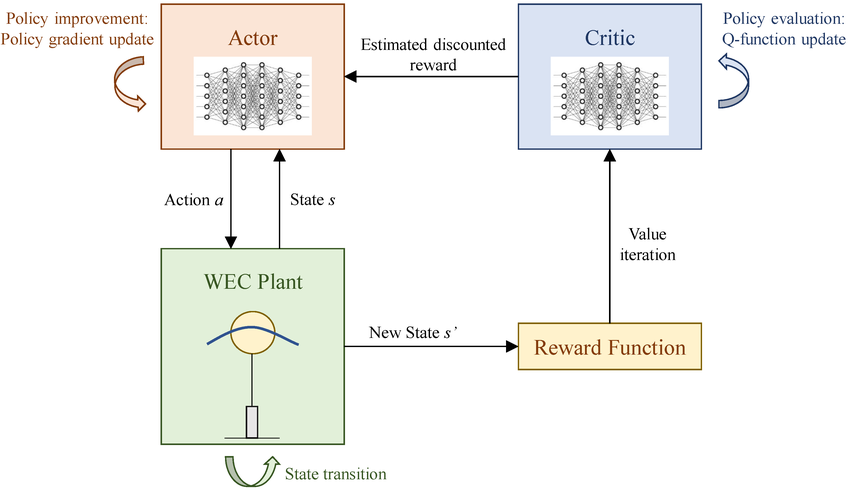


## 6️⃣ Formulación de Reward para RL

El reward $(r_t)$ que recibiría el agente RL podría definirse directamente como el **beneficio económico instantáneo** del ingenio:

$$
r_t = \Pi(T_m, W_{imb}, M_d, \dots) 
      = \underbrace{p_s Q_s(T_m, W_{imb}) + p_a Q_a(M_d) + p_e Q_e(T_m)}_{\text{Ingresos}} 
      - \underbrace{C_{op}(T_m, W_{imb}, M_d)}_{\text{Costos}}
$$

- Variables de acción del agente: $(T_m, W_{imb}, M_d)$ (en un caso real estas variables pueden ser decenas!)
- Reward se calcula en cada paso de control (cada lote o intervalo de tiempo)
- Constraints (limites físicos) pueden ser implementadas como **penalizaciones negativas** si el agente las viola:

$$
r_t = \Pi - \lambda \sum_i \max(0, u_i - u_i^{\max})^2 - \lambda \sum_i \max(0, u_i^{\min} - u_i)^2
$$

Esto permite que SAC aprenda la política óptima **explorando el sistema**, incluso si las relaciones son no lineales y no conocidas analíticamente.

<>:19: SyntaxWarning: invalid escape sequence '\P'
<>:19: SyntaxWarning: invalid escape sequence '\P'
/var/folders/z_/32_txhjj52v5k49pnwncxqnw0000gn/T/ipykernel_1364/3864726160.py:19: SyntaxWarning: invalid escape sequence '\P'
  ax.set_zlabel('Beneficio económico $\Pi(T_m,W_{imb},M_d)$')


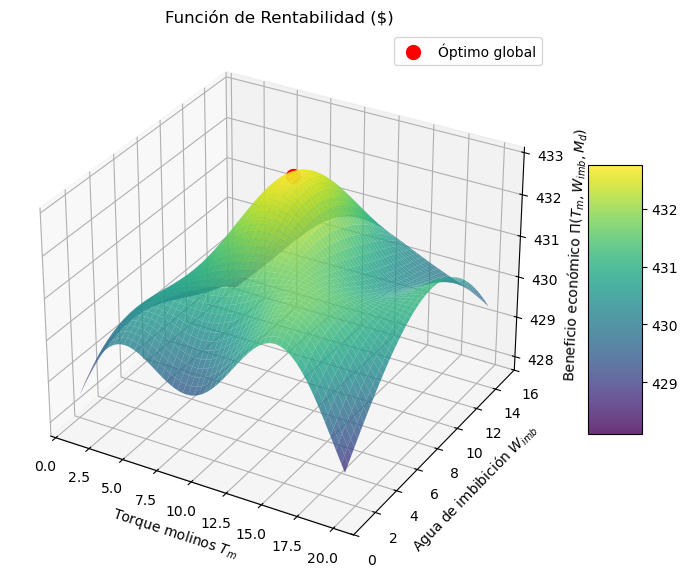

Óptimo global: T_m=9.80, W_imb=9.46, Beneficio=432.78


In [20]:
# Ejemplo artificial con múltiples máximos locales y un global interior
Profit_complex = (np.sin(0.5*T_mesh)*np.cos(0.3*W_mesh) 
                  - 0.02*(T_mesh-12)**2 - 0.03*(W_mesh-8)**2
                  + p_a*Q_a)  # incluir slice alcohol para efecto total

# Óptimo
max_idx = np.unravel_index(np.argmax(Profit_complex), Profit_complex.shape)
T_opt = T_mesh[max_idx]
W_opt = W_mesh[max_idx]
Pi_opt = Profit_complex[max_idx]

# Gráfica 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_mesh, W_mesh, Profit_complex, cmap='viridis', alpha=0.8)
ax.scatter(T_opt, W_opt, Pi_opt, color='r', s=100, label='Óptimo global')
ax.set_xlabel('Torque molinos $T_m$')
ax.set_ylabel('Agua de imbibición $W_{imb}$')
ax.set_zlabel('Beneficio económico $\Pi(T_m,W_{imb},M_d)$')
ax.set_title('Función de Rentabilidad ($)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
print(f"Óptimo global: T_m={T_opt:.2f}, W_imb={W_opt:.2f}, Beneficio={Pi_opt:.2f}")

## 8️⃣ Por qué un enfoque de márgenes puede fallar

En optimización económica, un enfoque clásico es igualar **Beneficio Marginal (BM) con Costo Marginal (CM)** para cada variable de decisión:

$$
\text{BM}_i = \frac{\partial R}{\partial u_i}, \quad
\text{CM}_i = \frac{\partial C}{\partial u_i}
$$

y se busca cumplir:

$$
\frac{\partial \Pi}{\partial u_i} = \frac{\partial R}{\partial u_i} - \frac{\partial C}{\partial u_i} = 0
$$

- Esto es equivalente a buscar los **puntos donde la derivada de la función de rentabilidad es cero**.
- El problema: esta condición garantiza solo un **máximo o mínimo local**, no necesariamente el **óptimo global**.
- En funciones **no lineales y con múltiples máximos locales**, un análisis puramente marginal puede indicar un “máximo” en un pico local (o un mínimo) que **no es la mejor decisión económica global**.

### Interpretación

- Cada máximo local cumple localmente: 

$$
\frac{\partial \Pi}{\partial T_m} = 0, \quad \frac{\partial \Pi}{\partial W_{imb}} = 0
$$

- Pero solo el **óptimo global interior** realmente maximiza el **beneficio total** considerando todos los trade-offs simultáneamente.
- Por eso, métodos que consideran **todo el beneficio económico total** o un **reward global**, como **SAC RL**, son necesarios para encontrar la verdadera solución óptima.

### Visualización

En la siguiente gráfica:

- **Óptimo global** marcado en **rojo**  
- **Todos los máximos locales** marcados en **azul**  

> Un enfoque de márgenes podría quedarse atrapado en cualquiera de los picos azules, sin alcanzar el global.

<>:52: SyntaxWarning: invalid escape sequence '\P'
<>:52: SyntaxWarning: invalid escape sequence '\P'
/var/folders/z_/32_txhjj52v5k49pnwncxqnw0000gn/T/ipykernel_1364/2017791579.py:52: SyntaxWarning: invalid escape sequence '\P'
  ax.set_zlabel('Beneficio económico $\Pi(T_m,W_{imb})$')


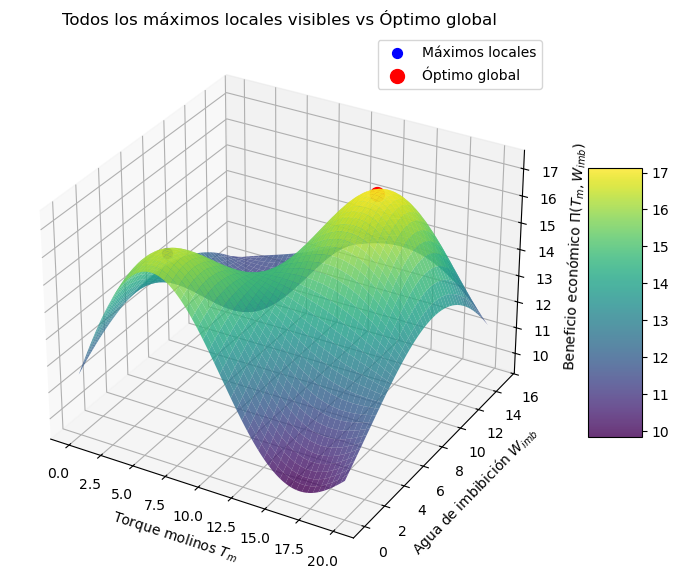

Óptimo global: T_m=14.97, W_imb=9.80, Beneficio=17.14
Número de máximos locales detectados: 1


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de variables
T_m = np.linspace(0, 20, 200)
W_imb = np.linspace(0, 15, 200)
T_mesh, W_mesh = np.meshgrid(T_m, W_imb)

# Crear función no lineal con varios máximos locales
Profit_complex = (
    3*np.sin(0.3*T_mesh)*np.cos(0.3*W_mesh)  # picos locales
    - 0.02*(T_mesh-10)**2 - 0.03*(W_mesh-7)**2  # máximo global interior
    + 15
)

# Encontrar máximos locales: cada punto mayor que sus 8 vecinos inmediatos
local_max_mask = np.zeros_like(Profit_complex, dtype=bool)
rows, cols = Profit_complex.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        patch = Profit_complex[i-1:i+2, j-1:j+2]
        if Profit_complex[i,j] == np.max(patch) and Profit_complex[i,j] > patch[1,1-1] and Profit_complex[i,j] > patch[1,1+1]:
            local_max_mask[i,j] = True

# Óptimo global
global_idx = np.unravel_index(np.argmax(Profit_complex), Profit_complex.shape)
T_opt = T_mesh[global_idx]
W_opt = W_mesh[global_idx]
Pi_opt = Profit_complex[global_idx]

# Excluir el máximo global de los locales
local_max_mask[global_idx] = False

# Coordenadas máximos locales
T_locals = T_mesh[local_max_mask]
W_locals = W_mesh[local_max_mask]
Pi_locals = Profit_complex[local_max_mask]

# Gráfica 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_mesh, W_mesh, Profit_complex, cmap='viridis', alpha=0.8)

# Máximos locales en azul
ax.scatter(T_locals, W_locals, Pi_locals, color='blue', s=50, label='Máximos locales')

# Óptimo global en rojo
ax.scatter(T_opt, W_opt, Pi_opt, color='red', s=100, label='Óptimo global')

ax.set_xlabel('Torque molinos $T_m$')
ax.set_ylabel('Agua de imbibición $W_{imb}$')
ax.set_zlabel('Beneficio económico $\Pi(T_m,W_{imb})$')
ax.set_title('Todos los máximos locales visibles vs Óptimo global')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

print(f"Óptimo global: T_m={T_opt:.2f}, W_imb={W_opt:.2f}, Beneficio={Pi_opt:.2f}")
print(f"Número de máximos locales detectados: {len(T_locals)}")